<a href="https://colab.research.google.com/github/AlexVS195/Data_Science/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Завантажити файл
uploaded = files.upload()

# Прочитайте csv файл (використовуйте функцію read_csv)
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

Saving bestsellers with categories.csv to bestsellers with categories (1).csv


In [ ]:
# Виведіть перші п'ять рядків (використовується функція head)
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [ ]:
# Виведіть розміри датасету (використовуйте атрибут shape)
print(df.shape)

(550, 7)


In [ ]:
# Перевірити наявність дублікатів у всьому датасеті
columns_to_check = ['Name', 'Author']
duplicates_subset = df.duplicated(subset=columns_to_check)
num_duplicates_subset = duplicates_subset.sum()

# Відкинути дублікати та зберегти тільки унікальні рядки
unique_df = df.drop_duplicates()

# Вивести кількість унікальних книг
num_unique_books = unique_df.shape[0] - num_duplicates_subset
print(f"Про скільки книг зберігає дані датасет? {num_unique_books}")

Про скільки книг зберігає дані датасет? 351


In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [ ]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
missing_values = df.isna().sum()
any_missing = missing_values.any()
print("Кількість пропусків у кожному стовпці:")
print(missing_values)

Кількість пропусків у кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [ ]:
# Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
print("Чи є в якихось змінних пропуски? (Так / ні):", "Так" if any_missing else "Ні")

Чи є в якихось змінних пропуски? (Так / ні): Ні


In [ ]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
unique_genres = df['genre'].unique()

In [ ]:
# Відповідь: Які є унікальні жанри?
print("Унікальні жанри:", unique_genres)

Унікальні жанри: ['Non Fiction' 'Fiction']


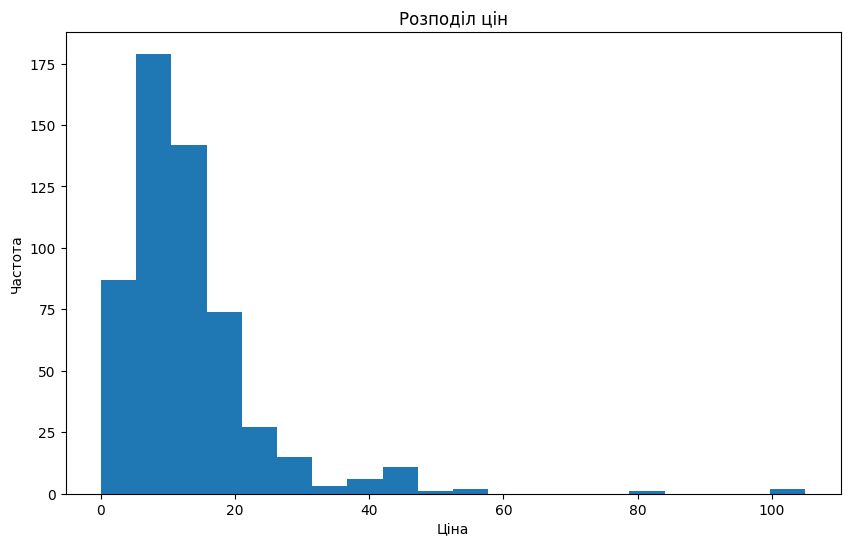

In [ ]:
import matplotlib.pyplot as plt

# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
df['price'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

In [ ]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

In [ ]:
# Відповідь: Максимальна ціна?
print("Максимальна ціна:", max_price)

Максимальна ціна: 105


In [ ]:
# Відповідь: Мінімальна ціна?
print("Мінімальна ціна:", min_price)

Мінімальна ціна: 0


In [ ]:
# Відповідь: Середня ціна?
print("Середня ціна:", mean_price)

Середня ціна: 13.1


In [ ]:
# Відповідь: Медіанна ціна?
print("Медіанна ціна:", median_price)

Медіанна ціна: 11.0


In [ ]:
# Відповідь: Який рейтинг у датасеті найвищий?
max_rating = df['user_rating'].max()
print("Найвищий рейтинг у датасеті:", max_rating)

Найвищий рейтинг у датасеті: 4.9


In [ ]:
# Відповідь: Скільки книг мають такий рейтинг?
num_books_with_max_rating = (df['user_rating'] == max_rating).sum()
print("Кількість книг з таким рейтингом:", num_books_with_max_rating)

Кількість книг з таким рейтингом: 52


In [ ]:
# Відповідь: Яка книга має найбільше відгуків?
max_reviews_index = df['reviews'].idxmax()
book_with_max_reviews = df.loc[max_reviews_index]
print("Яка книга має найбільше відгуків?")
print(book_with_max_reviews)

Яка книга має найбільше відгуків?
name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


In [ ]:
# Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
# Проміжний датафрейм для книг, що потрапили до Топ-50 у 2015 році
top_50_2015 = df[df['year'] == 2015]

# Індекс рядка з найдорожчою книгою серед тих, що потрапили до Топ-50 у 2015 році
max_price_index = top_50_2015['price'].idxmax()

# Назва найдорожчої книги
most_expensive_book_name_2015 = top_50_2015.loc[max_price_index, 'name']

print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь:", most_expensive_book_name_2015)

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [ ]:
# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
num_fiction_books_2010 = ((df['genre'] == 'Fiction') & (df['year'] == 2010)).sum()
print("Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році:", num_fiction_books_2010)

Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: 20


In [ ]:
# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
num_books_rating_4_9 = ((df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))).sum()
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь:", num_books_rating_4_9)

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1


In [ ]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
sorted_books = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')

# Вивести відсортований DataFrame
from IPython.display import display
display(sorted_books)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [ ]:
# Відповідь: Яка книга остання у відсортованому списку?
last_book = sorted_books.iloc[-1]

print("Відповідь: Яка книга остання у відсортованому списку?")
print(last_book)

Відповідь: Яка книга остання у відсортованому списку?
name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object


In [ ]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min).
for genre in genre_price_stats.index:
    max_price = genre_price_stats.loc[genre, 'max']
    min_price = genre_price_stats.loc[genre, 'min']
    print(f"Максимальна ціна для жанру {genre}? Відповідь: {max_price}")
    print(f"Мінімальна ціна для жанру {genre}? Відповідь: {min_price}")

Максимальна ціна для жанру Fiction? Відповідь: 82
Мінімальна ціна для жанру Fiction? Відповідь: 0
Максимальна ціна для жанру Non Fiction? Відповідь: 105
Мінімальна ціна для жанру Non Fiction? Відповідь: 0


In [ ]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
# Створення нового датафрейму з кількістю книг для кожного автора
author_books_count = df.groupby('author')['name'].count().reset_index()

# Перейменування стовпців для зручності
author_books_count.columns = ['author', 'book_count']

# Виведення розмірності таблиці
print("Якої розмірності вийшла таблиця? Відповідь:", author_books_count.shape)

# Знаходження автора з найбільшою кількістю книг
author_with_most_books = author_books_count.loc[author_books_count['book_count'].idxmax()]

# Виведення автора з найбільшою кількістю книг та його кількості книг
print("Який автор має найбільше книг? Відповідь:", author_with_most_books['author'])
print("Скільки книг цього автора? Відповідь:", author_with_most_books['book_count'])

Якої розмірності вийшла таблиця? Відповідь: (248, 2)
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


In [ ]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index()

# Перейменування стовпців для зручності
author_avg_rating.columns = ['author', 'avg_rating']

# Виведення результатів
min_avg_rating_author = author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin()]
print("У якого автора середній рейтинг мінімальний? Відповідь:", min_avg_rating_author['author'])
print("Який у цього автора середній рейтинг? Відповідь:", min_avg_rating_author['avg_rating'])

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9


In [ ]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
author_stats = pd.concat([author_books_count.set_index('author'), author_avg_rating.set_index('author')], axis=1)

# Відновлення індексу
author_stats = author_stats.reset_index()

# Перейменування стовпців
author_stats.columns = ['author', 'book_count', 'avg_rating']

In [ ]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
author_stats_sorted = author_stats.sort_values(by=['book_count', 'avg_rating'])
print(author_stats_sorted.head())

                author  book_count  avg_rating
171     Muriel Barbery           1         4.0
43        Chris Cleave           1         4.1
109  Ian K. Smith M.D.           1         4.1
186       Pierre Dukan           1         4.1
81    Elizabeth Strout           1         4.2


In [ ]:
# Виведення результату
print("Який автор перший у списку? Відповідь:", author_stats_sorted['author'].iloc[0])

Який автор перший у списку? Відповідь: Muriel Barbery


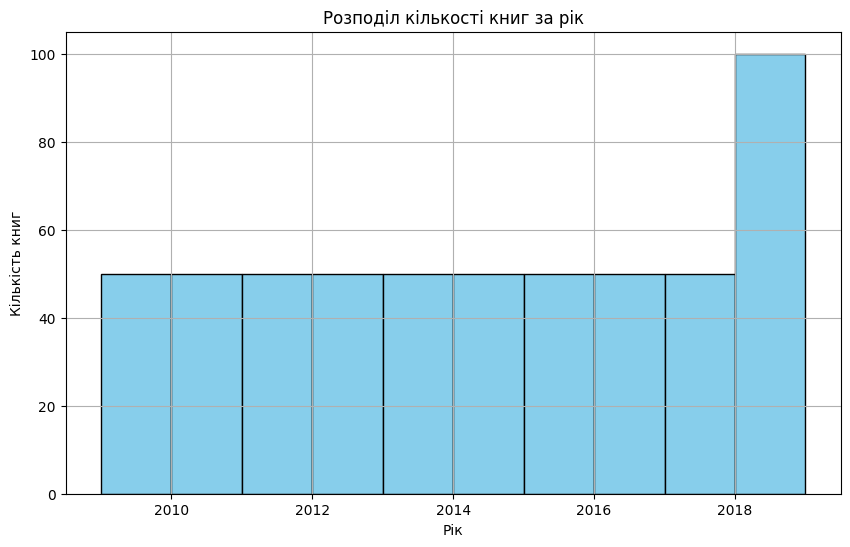

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Зчитуємо дані з CSV файлу
df = pd.read_csv('bestsellers with categories.csv')

# Побудова гістограми розподілу кількості книг за рік
plt.figure(figsize=(10, 6))
df['Year'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Розподіл кількості книг за рік')
plt.xlabel('Рік')
plt.ylabel('Кількість книг')
plt.grid(True)
plt.show()

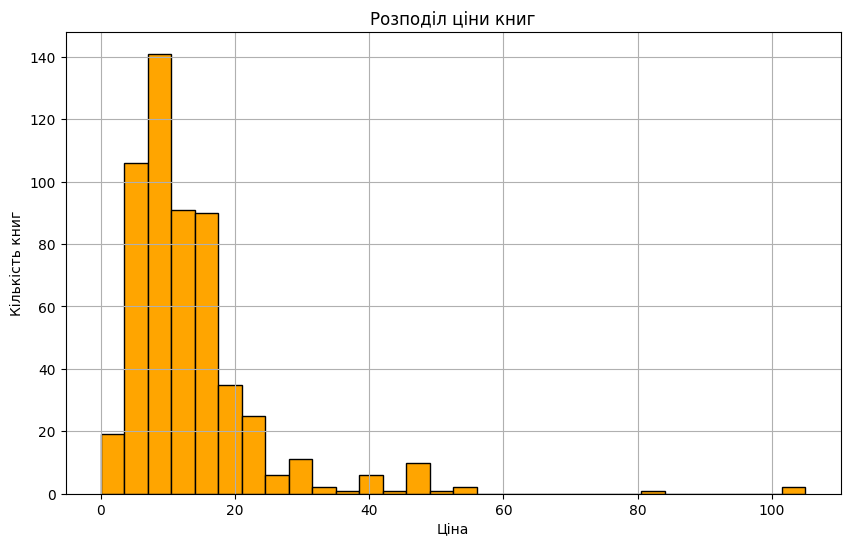

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Зчитуємо дані з CSV файлу
df = pd.read_csv('bestsellers with categories.csv')

# Побудова графіку розподілу ціни книг
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='orange', edgecolor='black')
plt.title('Розподіл ціни книг')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.grid(True)
plt.show()

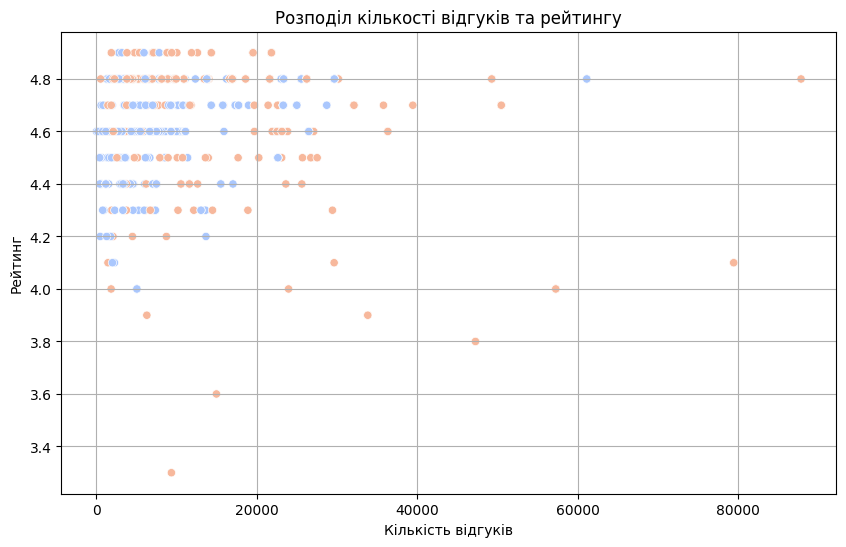

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Зчитуємо дані з CSV файлу
df = pd.read_csv('bestsellers with categories.csv')

# Побудова графіку розподілу кількості відгуків та рейтингу
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='User Rating', hue='Genre', palette='coolwarm')
plt.title('Розподіл кількості відгуків та рейтингу')
plt.xlabel('Кількість відгуків')
plt.ylabel('Рейтинг')
plt.grid(True)
plt.legend([], [], frameon=False)
plt.show()